### Anscombe's dataset

  - 이 데이터는 1973년 통계학자인 Francis Anscombe가 만든 것으로 데이터 분석에 앞서 시각화 그리고 특이치(outliar) 값의 영향을 보여주기 위해서 활용

In [ ]:
import seaborn as sns

In [ ]:
data = sns.load_dataset("anscombe")
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


- lmplot(line plot) /*x값과 y값의 관계 => 선형회귀 linear migration -> 계량경제학*/
: 선형 회귀 직선을 구하는 기능

시간 변수가 계속 변하는 것들, 주로 거시데이터. 쓰면 안됨. cross section 만 사용.

In [ ]:
import matplotlib.pyplot as plt

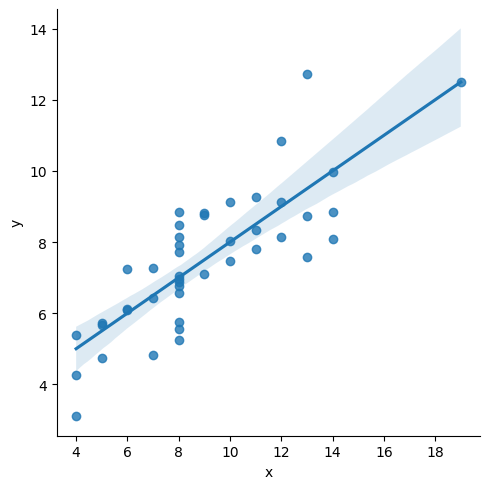

In [ ]:
sns.lmplot(x="x",y="y", data=data)
plt.show()

In [ ]:
data["dataset"].unique() #unique 고유값들에 어떤 종류가 있는지


array(['I', 'II', 'III', 'IV'], dtype=object)

- anscombe.query("dataset==I")
  - 이렇게 명령을 하면 첫번째 타임의 데이터 셋을 가져오는 것

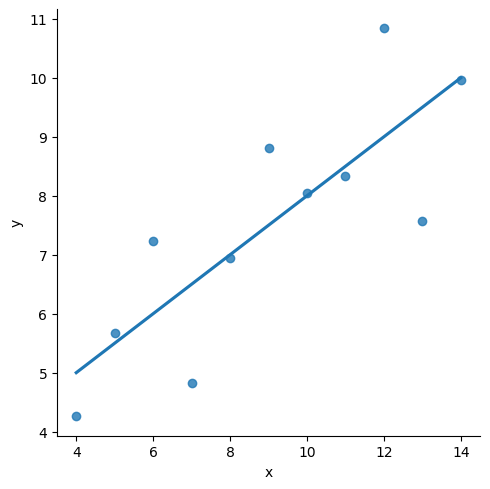

In [ ]:
sns.lmplot(x="x", y="y", data=data.query("dataset=='I'"), ci = None) #data.query() 조건 검색/ci meaning confidence interval

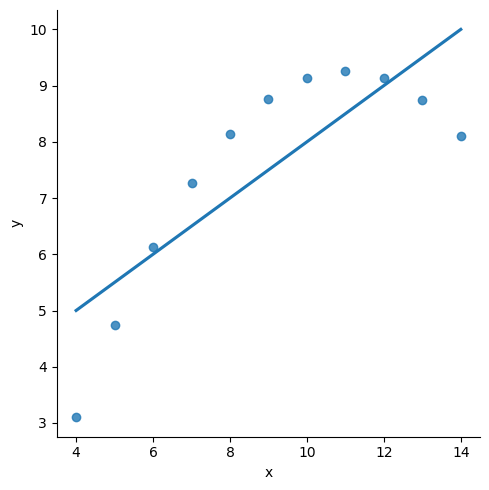

In [ ]:
sns.lmplot(x="x", y="y", data=data.query("dataset=='II'"), ci = None)

- 두 번째 타입의 데이터 셋은 비선형적인 데이터를 선형회귀 직선으로 표현(권장하는 방법은 아니다.)

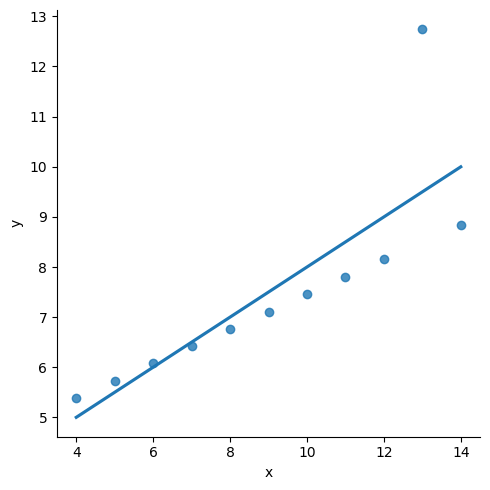

In [ ]:
sns.lmplot(x="x", y="y", data=data.query("dataset=='III'"), ci = None) #맨 위의 아웃라이어때문에 전체적인 선의 왜곡발생

- dataset 세번째 유형은 이상치가 존재한다.
- 이 이상치로 인하여 선형회귀 직선의 형태가 왜곡되고 있다.

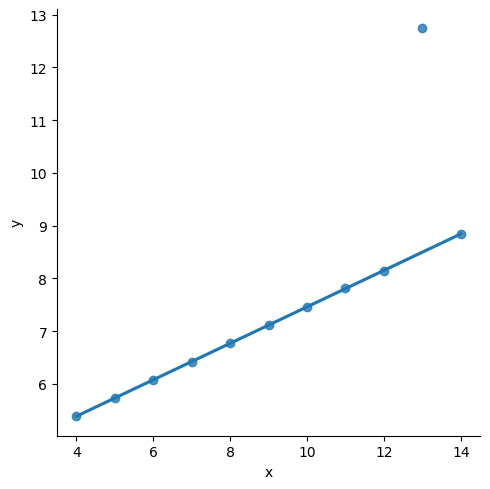

In [ ]:
sns.lmplot(x = "x", y = "y", data = data.query("dataset == 'III'"), ci = None, robust = True) #robust==강건하다, 아웃라이어 스스로 드랍

- robust = True
 - 이상치를 제거하는 선형회귀


- 이상치에 덜 민간한 강건한 모델로 plot함

# Boxplot

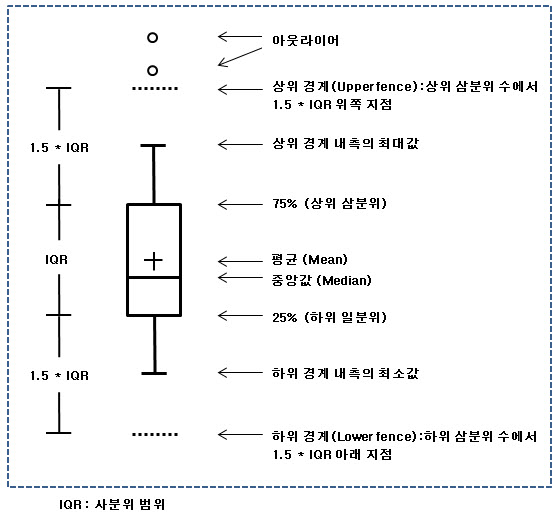

inter quarter range :  IQR
Q1, Q2, Q3 정규분포 내에 우리가 주로 찾는 값이 있다.

- lower outlier
  - Q1-1.5*IQR (보다 밑에 있는 거)


- upper outlier
  - Q3+1.5*IQR (보다 위에 있는 거)

## boxplot 생성

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
values1 = [82, 76, 24, 40, 67, 62, 75, 78, 71, 32, 98, 89, 78, 67, 72, 82, 87, 66, 56, 52]
values2 = [33, 54, 56, 73, 21, 46, 75, 32, 67, 84, 78, 89, 30, 10, 20, 49, 23, 54, 67, 21]
values3 = [34, 52, 64, 54, 86, 32, 57, 90, 76, 54, 37, 96, 31, 67, 45, 75, 32, 68, 89, 80]
values4 = [23, 43, 54, 67, 87, 23, 45, 65, 74, 67, 55, 83, 22, 37, 89, 56, 87, 32, 11, 44]

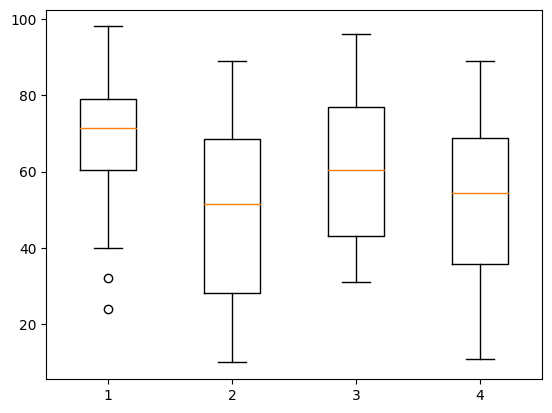

In [ ]:
box_plot_data = [values1, values2, values3, values4]

plt.boxplot(box_plot_data)
plt.show() #Q2 중간값(orange line)

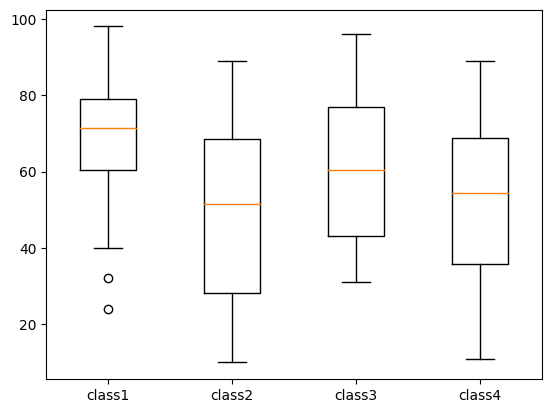

In [ ]:
plt.boxplot(box_plot_data, labels = ["class1", "class2", "class3", "class4"])
plt.show()

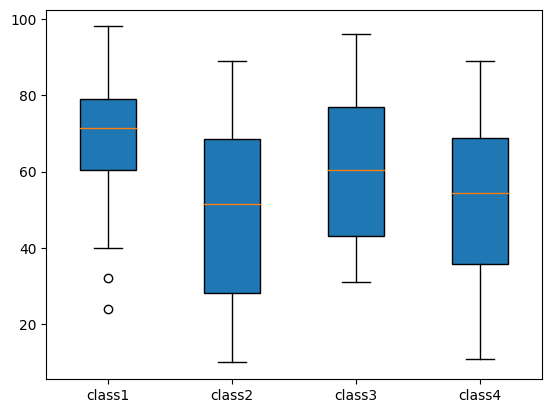

In [ ]:
plt.boxplot(box_plot_data, labels = ["class1", "class2", "class3", "class4"],
            patch_artist = True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame({'data' : [5, 7, 10, 15, 19, 21, 22, 23, 24, 25, 70]})

In [ ]:
df.head()

,data
0,5
1,7
2,10
3,15
4,19


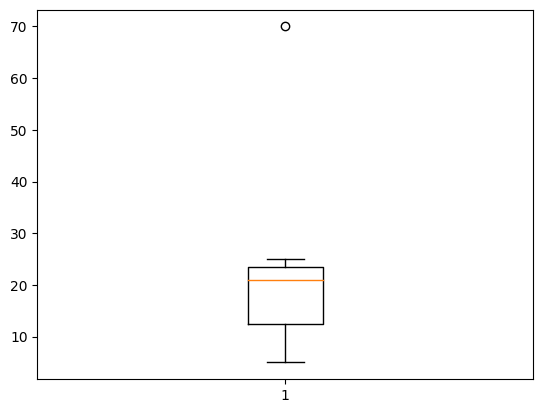

In [ ]:
plt.boxplot(df["data"])
plt.show()

In [ ]:
quant_df = df.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

In [ ]:
quant_df #Q1 Q3가 approximately 나온 것을 확인할 수 있다.

,data
0.01,5.2
0.25,12.5
0.50,21.0
0.75,23.5
0.99,65.5


In [ ]:
np.mean(df)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


data    21.909091
dtype: float64

- example

   - 1. 오름차순으로 정렬하기
   - 2. 중위수 찾기(median)
   - 3. 사분위수(IQR) 찾기 = (사분위값 찾기 (quantile))
   - 4. 최소값, 최대값 구하기

In [ ]:
sample = [70, 19, 25, 28, 29, 29, 30, 34,35, 37, 38]

In [ ]:
data = sorted(sample)

In [ ]:
data

[19, 25, 28, 29, 29, 30, 34, 35, 37, 38, 70]

In [ ]:
dataQ1 = np.percentile(data, 25) #quantile을 써서 25%를 구해도 되지만 list로 주면 이렇게.

In [ ]:
dataQ1

28.5

In [ ]:
dataQ3 = np.percentile(data, 75)

In [ ]:
dataQ3

36.0

In [ ]:
Q1, Q3 = np.percentile(data, [25, 75])
print(Q1, Q3)

28.5 36.0


In [ ]:
IQR = Q3 - Q1
IQR

7.5

In [ ]:
ul = Q3 + IQR*1.5
ll = Q1 - IQR*1.5

print(ul, ll) #lower outlier는 존재하지 않고, upper outlier를 능가하는 값을 가진 70이 존재-> 그래프 설명가능

47.25 17.25


#### example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

- concatenate 함수는 numpy 함수 중 매우 유용하게 쓰이는 것 중 하

  - numpy 배열들을 하나로 합치는데 이용함

In [ ]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [ ]:
b = np.array([[7, 8], [9, 10], [11, 12]])
b

array([[ 7,  8],
       [ 9, 10],
       [11, 12]])

In [ ]:
np.concatenate((a, b))

array([[ 1,  2],
       [ 3,  4],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

In [ ]:
np.concatenate((a, b.T), axis = 1) #행렬 가로로 붙이기, a와 b의 dimension이 달라서 transpose해야함. 행과 렬이 바뀌게^^. 쓰는 법 : 행렬.T

array([[ 1,  2,  7,  9, 11],
       [ 3,  4,  8, 10, 12]])

In [ ]:
np.random.seed(102)
grades = np.concatenate([[50, 52, 53, 54, 55, 56, 60, 61,62, 65, 67]*20, #100개
                         np.random.randint(0, 101, size = 300)]) #np.random.randint 0에서 101-1=100까지의 숫자 뽑기

In [ ]:
grades

array([ 50,  52,  53,  54,  55,  56,  60,  61,  62,  65,  67,  50,  52,
        53,  54,  55,  56,  60,  61,  62,  65,  67,  50,  52,  53,  54,
        55,  56,  60,  61,  62,  65,  67,  50,  52,  53,  54,  55,  56,
        60,  61,  62,  65,  67,  50,  52,  53,  54,  55,  56,  60,  61,
        62,  65,  67,  50,  52,  53,  54,  55,  56,  60,  61,  62,  65,
        67,  50,  52,  53,  54,  55,  56,  60,  61,  62,  65,  67,  50,
        52,  53,  54,  55,  56,  60,  61,  62,  65,  67,  50,  52,  53,
        54,  55,  56,  60,  61,  62,  65,  67,  50,  52,  53,  54,  55,
        56,  60,  61,  62,  65,  67,  50,  52,  53,  54,  55,  56,  60,
        61,  62,  65,  67,  50,  52,  53,  54,  55,  56,  60,  61,  62,
        65,  67,  50,  52,  53,  54,  55,  56,  60,  61,  62,  65,  67,
        50,  52,  53,  54,  55,  56,  60,  61,  62,  65,  67,  50,  52,
        53,  54,  55,  56,  60,  61,  62,  65,  67,  50,  52,  53,  54,
        55,  56,  60,  61,  62,  65,  67,  50,  52,  53,  54,  5

In [ ]:
Q1, Q3 = np.percentile(grades, [25, 75])
print(Q1, Q3)

43.0 65.0


#시험 합쳐서 행렬 랜덤 300개 제너레이트해서 하나로 합쳐라 큐원 큐쓰리 구해라~ 씨드를 이렇게 두어라 조건걸고.

In [ ]:
IQR1 = Q3 - Q1

In [ ]:
ul1 = Q3 + IQR1*1.5
ll1 = Q1 + IQR1*1.5

print(ul1,ll1)

98.0 76.0


#### Find Outliers

In [ ]:
outliers = grades[(grades>ul1) | (grades<ll1)]

In [ ]:
outliers

array([ 50,  52,  53,  54,  55,  56,  60,  61,  62,  65,  67,  50,  52,
        53,  54,  55,  56,  60,  61,  62,  65,  67,  50,  52,  53,  54,
        55,  56,  60,  61,  62,  65,  67,  50,  52,  53,  54,  55,  56,
        60,  61,  62,  65,  67,  50,  52,  53,  54,  55,  56,  60,  61,
        62,  65,  67,  50,  52,  53,  54,  55,  56,  60,  61,  62,  65,
        67,  50,  52,  53,  54,  55,  56,  60,  61,  62,  65,  67,  50,
        52,  53,  54,  55,  56,  60,  61,  62,  65,  67,  50,  52,  53,
        54,  55,  56,  60,  61,  62,  65,  67,  50,  52,  53,  54,  55,
        56,  60,  61,  62,  65,  67,  50,  52,  53,  54,  55,  56,  60,
        61,  62,  65,  67,  50,  52,  53,  54,  55,  56,  60,  61,  62,
        65,  67,  50,  52,  53,  54,  55,  56,  60,  61,  62,  65,  67,
        50,  52,  53,  54,  55,  56,  60,  61,  62,  65,  67,  50,  52,
        53,  54,  55,  56,  60,  61,  62,  65,  67,  50,  52,  53,  54,
        55,  56,  60,  61,  62,  65,  67,  50,  52,  53,  54,  5

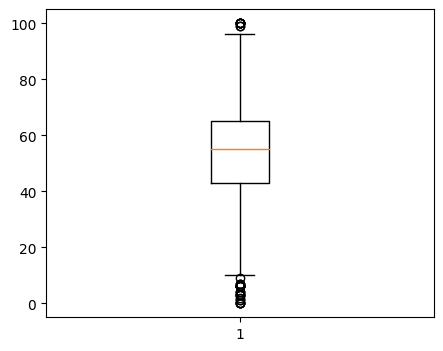

In [ ]:
fig = plt.figure(figsize = (5, 4)) #없어도됨 그냥 사이즈 조정
plt.boxplot(grades)
plt.show()